load some modules

In [92]:
import xarray as xr
import pandas as pd
import csv
import os
import fiona
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

where is my csv?

In [4]:
path_to_csv_attribute_table = '/g/data/r78/rjd547/Ramsar_Wetlands/exploded_ramsar_attribute_table.csv'

In [5]:
ramsar_exploded = pd.read_csv(path_to_csv_attribute_table)

In [6]:
ramsar_exploded.head()

,OBJECTID,REFCODE,RAMSAR_NAM,WETLAND_NA,STATE,JURISDICTI,DESIGNATIO,TOTAL_SITE,GAZETTED_A,SOURCE,Metadata_U,WetlandsDB,SHAPE_Leng,SHAPE_Area,AREA_HA
0,1,1,Cobourg Peninsula,Cobourg Peninsula,NT,NT,1974-05-08,226481.0,220700.0,State agencies; 1:100 000 to satellite imagery,http://www.environment.gov.au/fed/catalog/main...,http://www.environment.gov.au/cgi-bin/wetlands...,6.815105,0.187566,226480.681675
1,1,1,Cobourg Peninsula,Cobourg Peninsula,NT,NT,1974-05-08,226481.0,220700.0,State agencies; 1:100 000 to satellite imagery,http://www.environment.gov.au/fed/catalog/main...,http://www.environment.gov.au/cgi-bin/wetlands...,6.815105,0.187566,226480.681675
2,1,1,Cobourg Peninsula,Cobourg Peninsula,NT,NT,1974-05-08,226481.0,220700.0,State agencies; 1:100 000 to satellite imagery,http://www.environment.gov.au/fed/catalog/main...,http://www.environment.gov.au/cgi-bin/wetlands...,6.815105,0.187566,226480.681675
3,1,1,Cobourg Peninsula,Cobourg Peninsula,NT,NT,1974-05-08,226481.0,220700.0,State agencies; 1:100 000 to satellite imagery,http://www.environment.gov.au/fed/catalog/main...,http://www.environment.gov.au/cgi-bin/wetlands...,6.815105,0.187566,226480.681675
4,1,1,Cobourg Peninsula,Cobourg Peninsula,NT,NT,1974-05-08,226481.0,220700.0,State agencies; 1:100 000 to satellite imagery,http://www.environment.gov.au/fed/catalog/main...,http://www.environment.gov.au/cgi-bin/wetlands...,6.815105,0.187566,226480.681675


In [7]:
# read filenames from directory, add to dataframe, and compare against ramsar list


In [11]:
ramsars_run = []
for file in os.listdir('/g/data/r78/rjd547/Ramsar_Wetlands/Ramsar_Outputs_1/'):
    if file.endswith(".csv"):
        ramsars_run.append(file)  

In [27]:
ramsars_run[0:5]

['Vasse-Wonnerup_System-Vasse-Wonnerup_System-WA-117.csv',
 'Ashmore_Reef_National_Nature_Reserve-Ashmore_Reef_National_Nature_Reserve-EXT-227.csv',
 'Moreton_Bay-Moreton_Bay-QLD-146.csv',
 'NSW_Central_Murray_State_Forests-Koondrook_Forest_Group-NSW-236.csv',
 'Moreton_Bay-Moreton_Bay-QLD-140.csv']

In [ ]:
# def get_RAMSAR_polyName(shapefile):
#     ''' function designed specifically for the RAMSAR wetlands australia shapefile. Takes the shapefile and extracts
#     the ramsar name, wetland name and objectID from the ESRI shapefile format and turns it into a useful string for our output.
#     :Inputs: shapefile with RAMSAR_NAM, WETLAND_NA, and OBJECTID as properties. 
#     Author: Bex Dunn Last Edited: March 2019'''
#     # get the ramsar name from the shapes 
#     RAMSAR_NAME = '_'.join(shapefile['properties']['RAMSAR_NAM'].split(' '))
#     WETLAND_NAME = '_'.join(shapefile['properties']['WETLAND_NA'].split(' '))
#     STATE = '_'.join(shapefile['properties']['STATE'].split(' ')) 
#     ID = shapefile['id']
#     polyName = f'{RAMSAR_NAME}-{WETLAND_NAME}-{STATE}-{ID}'
#     print(f'processing polygon {polyName}')
#     return(polyName)

In [25]:
ramsar_exploded_index = ramsar_exploded.index.tolist()

In [39]:
#get list of runs
run_list = []
for i in ramsars_run:
    i = i.split('-') #break up filename
    i = i[-1] #get last bit
    i = i.split('.')[0]
    i =int(i)
    run_list.append(i)

In [41]:
run_list.sort()

In [45]:
missing_runs = set(ramsar_exploded_index) - set(run_list)
print(missing_runs)

{228, 229, 230, 231, 105, 266, 12, 93, 185, 90, 125}


In [53]:
missing_runs = list(missing_runs)

In [73]:
ramsar_exploded.loc[wetland_number].name

125

In [75]:
for wetland_number in missing_runs:
    print (f'\'{ramsar_exploded.loc[wetland_number][3]}, OBJECTID:{ramsar_exploded.loc[wetland_number][0]}, ID:{ramsar_exploded.loc[wetland_number].name} \',')

'Coral Sea Reserves (Coringa-Herald and Lihou Reefs and Cays), OBJECTID:99, ID:228 ',
'Coral Sea Reserves (Coringa-Herald and Lihou Reefs and Cays), OBJECTID:99, ID:229 ',
'Elizabeth and Middleton Reefs Marine National Nature Reserve, OBJECTID:100, ID:230 ',
'The Dales, OBJECTID:101, ID:231 ',
'Eighty-mile Beach, OBJECTID:65, ID:105 ',
'Peery, OBJECTID:109, ID:266 ',
'Kakadu National Park, OBJECTID:2, ID:12 ',
'Coongie Lakes, OBJECTID:57, ID:93 ',
'Pulu Keeling National Park, OBJECTID:77, ID:185 ',
'The Coorong, and Lakes Alexandrina and Albert Wetland, OBJECTID:55, ID:90 ',
'Hosnies Spring, OBJECTID:71, ID:125 ',


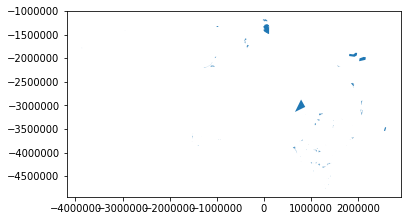

In [102]:
ramsar_to_plot = gpd.read_file(ramsar_shapes)
ramsar_to_plot.plot()
plt.show()

In [114]:
type(missing_runs[0])

int

In [109]:
ramsar_shapes =  '/g/data/r78/rjd547/Ramsar_Wetlands/ExplodedRAMSAR.shp'

In [110]:

#### trying to get each of the features matching wetland name and id into a separate file

In [117]:
with fiona.open(ramsar_shapes) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/Ramsar_Wetlands/ramsar_notrun_v1.shp','w',**meta) as outshape:
        for feature in inshape:
                if int(feature['id']) in missing_runs:
                    print(feature['properties']['WETLAND_NA'])   
                    outshape.write(feature)
                   
                    

Kakadu National Park
The Coorong, and Lakes Alexandrina and Albert Wetland
Coongie Lakes
Eighty-mile Beach
Hosnies Spring
Pulu Keeling National Park
Coral Sea Reserves (Coringa-Herald and Lihou Reefs and Cays)
Coral Sea Reserves (Coringa-Herald and Lihou Reefs and Cays)
Elizabeth and Middleton Reefs Marine National Nature Reserve
The Dales
Peery


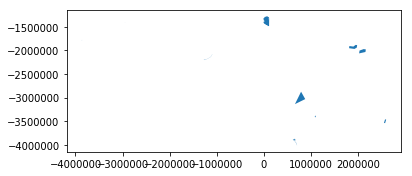

In [118]:
outshape_written = gpd.read_file('/g/data/r78/rjd547/Ramsar_Wetlands/ramsar_notrun_v1.shp')
outshape_written.plot()
plt.show()